In [2]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project
# Using our Carbon-I and vSmartMOM packages (developed by our team)

using CairoMakie, DelimitedFiles, Statistics, Interpolations
using Unitful, UnitfulEquivalences
include(joinpath("../../src/Plots", "CI_colorsNew.jl"));
set_theme!(theme_ggplot2())

  Activating project at `~/code/gitHub/CarbonI`


In [3]:
CarbonI_colors

In [5]:
# Read data from other notebooks
l1_1_data = readdlm("../../data/L1s/L1-1_lines.dat");
l1_2_data = readdlm("../../data/L1s/L1-2_lines.dat");
TotalEfficiencies = l1_2_data[:, 1];

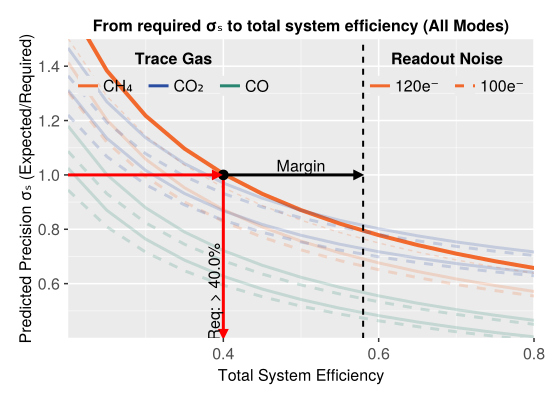

In [10]:
f = Figure(resolution=(550,400), backgroundcolor=:transparent)
ax = Axis(f[1,1], xlabel="Total System Efficiency", ylabel="Predicted Precision σₛ (Expected/Required)", yticks=0.6:0.2:1.4, title="From required σₛ to total system efficiency (All Modes)")
# For CH4 (100 and 120e-)
al = 0.2
ch4_120 = lines!(ax, TotalEfficiencies, l1_1_data[:,2], color=CarbonI_colors[5], linewidth=3, label="CH₄ (120e⁻)", alpha=al)
ch4_100 = lines!(ax, TotalEfficiencies, l1_1_data[:,3], color=CarbonI_colors[5], linewidth=3, linestyle=:dash, label="CH₄ (100e⁻)", alpha=al)
lines!(ax, TotalEfficiencies, l1_2_data[:,2], color=CarbonI_colors[5], linewidth=4)
lines!(ax, TotalEfficiencies, l1_2_data[:,3], color=CarbonI_colors[5], llinewidth=3, linestyle=:dash, alpha=al)
# For CO2 (100 and 120e-)
co2_120 = lines!(ax, TotalEfficiencies, l1_1_data[:,4], color=CarbonI_colors[4], linewidth=3, label="CO₂ (120e⁻)", alpha=al)
co2_100 = lines!(ax, TotalEfficiencies, l1_1_data[:,5], color=CarbonI_colors[4], linewidth=3, linestyle=:dash, label="CO₂ (100e⁻)", alpha=al)
lines!(ax, TotalEfficiencies, l1_2_data[:,4], color=CarbonI_colors[4], linewidth=3, alpha=al)
lines!(ax, TotalEfficiencies, l1_2_data[:,5], color=CarbonI_colors[4], linewidth=3, linestyle=:dash, alpha=al)
# For CO (100 and 120e-)
co_120 = lines!(ax, TotalEfficiencies, l1_1_data[:,6], color=CarbonI_colors[3], linewidth=3, label="CO (120e⁻)", alpha=al)
co_100 = lines!(ax, TotalEfficiencies, l1_1_data[:,7], color=CarbonI_colors[3], linewidth=3, linestyle=:dash, label="CO (100e⁻)", alpha=al)
lines!(ax, TotalEfficiencies, l1_2_data[:,6], color=CarbonI_colors[3], linewidth=3, alpha=al)
lines!(ax, TotalEfficiencies, l1_2_data[:,7], color=CarbonI_colors[3], linewidth=3, linestyle=:dash, alpha=al)

#lines!(ax, TotalEfficiencies, ones(length(TotalEfficiencies)), color=:black, linewidth=2, label="Requirement")

req_eff = 0.40
req_error = 1.0
eff_cbe = 0.58
arrows!(ax, [req_eff,],[req_error,],[0,],[-req_error+0.42,],arrowsize = 15, linewidth=3,color = color = :red)
text!(ax, "Req: > $(round(100req_eff,sigdigits = 3))%", position = (req_eff, 0.57),
    align = (:center, :bottom), color = :black, rotation=π/2)


# Indicate Margins
arrows!(ax, [req_eff+0.002,],[req_error,],[eff_cbe-req_eff-0.01,],[0,],arrowsize = 15, linewidth=3, color = :black)
text!(ax, "Margin", position = (0.5, req_error),  align = (:center, :bottom), color = :black)
DR = scatter!(ax, [req_eff], [req_error], color=:black, markersize=15, label="Driving Req.")
arrows!(ax, [0.0,],[1,],[req_eff-0.01,],[0,],arrowsize = 15, linewidth=3, color = :red)
# Show CBE Total Efficiency
CBE = lines!(ax, [eff_cbe,eff_cbe], [0,1.5], color=:black, linestyle=:dash, linewidth=2, label="CBE")
axislegend(ax, [ch4_120, co2_120,co_120], ["CH₄", "CO₂","CO"], "Trace Gas", position = :lt,
    orientation = :horizontal)
axislegend(ax, [ch4_120, ch4_100], ["120e⁻", "100e⁻"], "Readout Noise", position = :rt,
    orientation = :horizontal)

xlims!(ax,0.2,0.8)
ylims!(ax,0.4,1.5)
#axislegend(ax,position = :rt)
save("../../plots/final/FO-E1-Level1-1_2-EfficiencyDerivation_perGas.pdf",f)
save("../../plots/final/FO-E1-Level1-1_2-EfficiencyDerivation_perGas.eps",f)
f